## Importing Libraries and Data

In [1]:
import numpy as np
import scipy as sp
import os
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import re
exec(open('useful.py').read())

# make the Pandas tables a little more readable
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
mcd_menu = pd.read_csv("menu.csv", index_col=1)
subway_menu = pd.read_csv("subway_menu.csv", index_col=0)

## Cleaning Datasets

In [3]:
mcd_menu.head()

,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Item,,,,,,,,,,,,,,,,,,,,,
Egg McMuffin,Breakfast,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,...,31,10,4,17,3,17,10,0,25,15
Egg White Delight,Breakfast,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,...,30,10,4,17,3,18,6,0,25,8
Sausage McMuffin,Breakfast,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,...,29,10,4,17,2,14,8,0,25,10
Sausage McMuffin with Egg,Breakfast,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,...,30,10,4,17,2,21,15,0,30,15
Sausage McMuffin with Egg Whites,Breakfast,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,...,30,10,4,17,2,21,6,0,25,10


In [4]:
subway_menu.head()

,Category,Serving Size (g),Calories,Cal. From Fat,Total Fat (g),Sat. Fat (g),Trans Fat (g)*,Chol. (mg),Sodium (mg),Carbohydrate(g),Dietary Fiber (g),Sugars (g),Protein(g),Vitamin A % DV,Vitamin C % DV,Calcium % DV,Iron % DV
Item,,,,,,,,,,,,,,,,,
"6"" Black Forest Ham",Sandwich,219,290,40,4.5,1.0,0.0,25,800,46,5,8,18,8,20,30,15
"6"" Oven Roasted Chicken",Sandwich,233,320,45,5.0,1.5,0.0,45,610,46,5,8,23,8,30,30,15
"6"" Roast Beef",Sandwich,233,320,40,5.0,1.5,0.0,45,660,45,5,7,25,8,20,30,25
"6"" Rotisserie-Style Chicken",Sandwich,247,350,55,6.0,1.5,0.0,55,540,45,5,7,29,10,20,30,20
"6"" Subway Club®",Sandwich,240,310,40,4.5,1.5,0.0,40,840,46,5,8,23,8,20,30,20


In [5]:
mcd_columns = mcd_menu.columns
subway_columns = subway_menu.columns

In [6]:
for column in mcd_columns:
    print(column, ":", mcd_menu[column].dtype)

Category : object
Serving Size : object
Calories : int64
Calories from Fat : int64
Total Fat : float64
Total Fat (% Daily Value) : int64
Saturated Fat : float64
Saturated Fat (% Daily Value) : int64
Trans Fat : float64
Cholesterol : int64
Cholesterol (% Daily Value) : int64
Sodium : int64
Sodium (% Daily Value) : int64
Carbohydrates : int64
Carbohydrates (% Daily Value) : int64
Dietary Fiber : int64
Dietary Fiber (% Daily Value) : int64
Sugars : int64
Protein : int64
Vitamin A (% Daily Value) : int64
Vitamin C (% Daily Value) : int64
Calcium (% Daily Value) : int64
Iron (% Daily Value) : int64


In [7]:
for column in subway_columns:
    print(column, ":", subway_menu[column].dtype)

Category : object
Serving Size (g) : int64
Calories : object
Cal. From Fat : int64
Total Fat (g) : float64
Sat. Fat (g) : float64
Trans Fat (g)* : float64
Chol. (mg) : int64
Sodium (mg) : int64
Carbohydrate(g) : object
Dietary Fiber (g) : object
Sugars (g) : int64
Protein(g) : int64
Vitamin A % DV : int64
Vitamin C % DV : int64
Calcium % DV : int64
Iron % DV : int64


In [8]:
for column in mcd_columns[1:]:
    mcd_menu[column] = pd.to_numeric(mcd_menu[column], errors='coerce')

In [9]:
for column in subway_columns[1:]:
    subway_menu[column] = pd.to_numeric(subway_menu[column], errors='coerce')

In [10]:
mcd_menu = mcd_menu.fillna(0)

In [11]:
subway_menu = subway_menu.fillna(0)

In [12]:
footlong_subs = subway_menu[subway_menu.Category == 'Sandwich'].ix[:,1:] * 2

In [13]:
mcd_columns

Index(['Category', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [14]:
focus_columns = ['Category', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat','Cholesterol','Sodium','Carbohydrates', 'Sugars', 'Protein',]

In [15]:
subway_columns

Index(['Category', 'Serving Size (g)', 'Calories', 'Cal. From Fat',
       'Total Fat (g)', 'Sat. Fat (g)', 'Trans Fat (g)*', 'Chol. (mg)',
       'Sodium (mg)', 'Carbohydrate(g)', 'Dietary Fiber (g)', 'Sugars (g)',
       'Protein(g)', 'Vitamin A % DV', 'Vitamin C % DV', 'Calcium % DV',
       'Iron % DV'],
      dtype='object')

In [16]:
subway_menu.rename(columns={'Serving Size (g)': 'Serving Size', 'Cal. From Fat': 'Calories from Fat',
                           'Total Fat (g)': 'Total Fat', 'Sat. Fat (g)': 'Saturated Fat', 'Trans Fat (g)*': 'Trans Fat',
                            'Chol. (mg)': 'Cholesterol', 'Sodium (mg)': 'Sodium', 'Carbohydrate(g)': 'Carbohydrates',
                            'Dietary Fiber (g)': 'Dietary Fiber', 'Sugars (g)': 'Sugars', 'Protein(g)': 'Protein',
                            'Vitamin A % DV': 'Vitamin A (% Daily Value)', 'Vitamin C % DV' : 'Vitamin C (% Daily Value)',
                            'Calcium % DV': 'Calcium (% Daily Value)','Iron % DV': 'Iron (% Daily Value)'}, inplace=True)

In [17]:
subway_columns = subway_menu.columns

In [18]:
mcd_menu.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [19]:
subway_menu.Category.unique()

array(['Sandwich', 'Salad', 'Dressing', 'Breakfast', 'Pizza', 'Bread',
       'Condiments', 'Vegetables', 'Cheese', 'Meat', 'Dessert', 'Soup'], dtype=object)

## Research Questions

* For McDonald's:
    * Are alternative menu options that are perceived to be healthy actually healthier for you?
    * How much does making a healthy choice between two similar items improve nutritional content?
* For Subway:
    * Which sandwiches are actually healthy?
    * Is a footlong sub a reasonable portion size?
    * How much does dressing, extra cheese, extra meat change the nutrition content of a sub?
* For Both:
    * How many items need to be eaten to reach:
        * 2000 calories, or 650 calories for a typical meal
        * Daily recommended protein, sodium, and carb intakes
    * What is the average nutritional breakdown for a typical meal? (come up with 5 different meal options)
    * How much of a typical meal should actually be eaten if one wishes to remain on target for daily nutrional values?
    * Develop methodology to rank the relative health of each item on the menu on a category by category basis
    * Which items from McDonald's and Subway are similar to each other in terms of nutritional content?
    * Which restaurant is healthier?

### Methods to explore the questions mentioned above..
* Can show different levels of health through K-means clustering - how similar are salads and burgers?
* Plot different nutritional factors as a % of total calories
* Classify relative nutritional content using a decision tree
* Pearson correlation of all the columns using a heatmap

## Basic Descriptive Stats

### McDonalds

/Users/alexschwartz/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/alexschwartz/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/alexschwartz/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


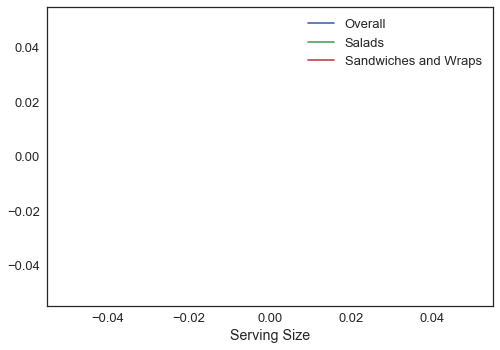

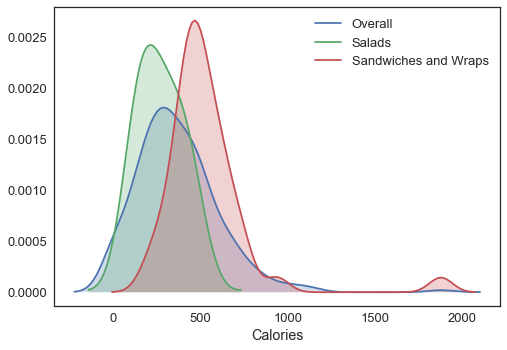

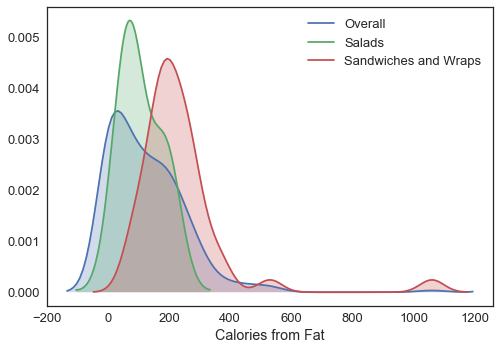

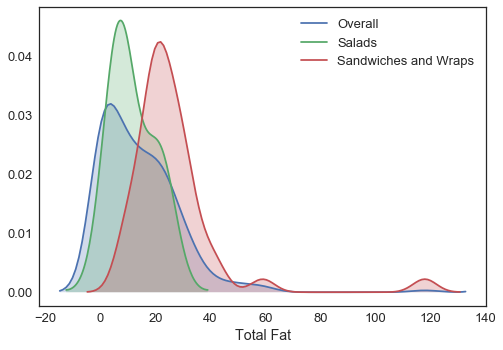

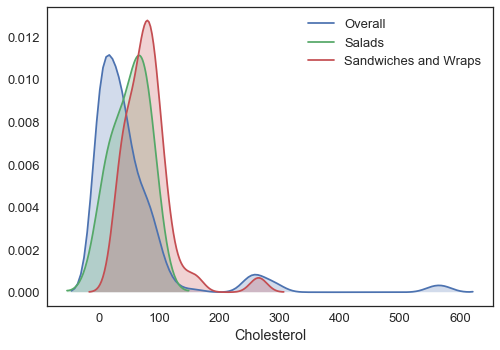

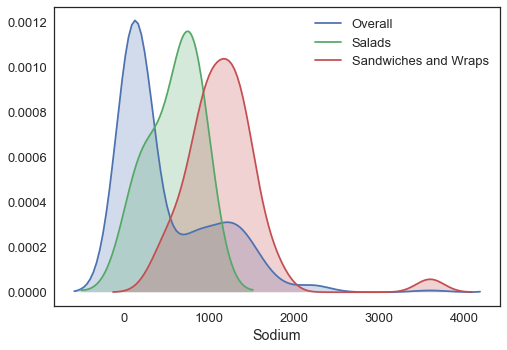

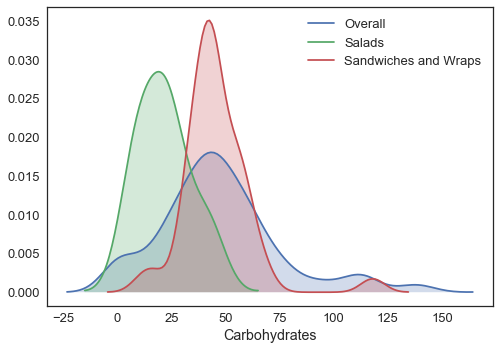

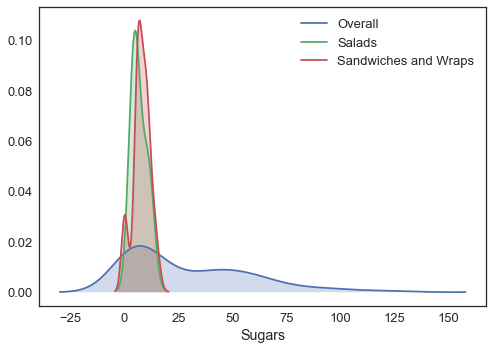

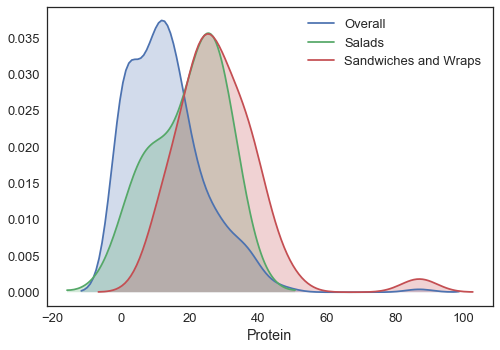

In [20]:
for column in focus_columns[1:]:
    sns.distplot(mcd_menu[column], hist=False, kde_kws={"shade": True}, label = 'Overall')
    sns.distplot(mcd_menu[mcd_menu.Category == 'Salads'][column], hist=False, kde_kws={"shade": True}, label = 'Salads')
    sns.distplot(mcd_menu[(mcd_menu.Category == 'Beef & Pork') | (mcd_menu.Category == 'Chicken & Fish')][column], hist=False, kde_kws={"shade": True}, label = 'Sandwiches and Wraps')
    plt.figure()

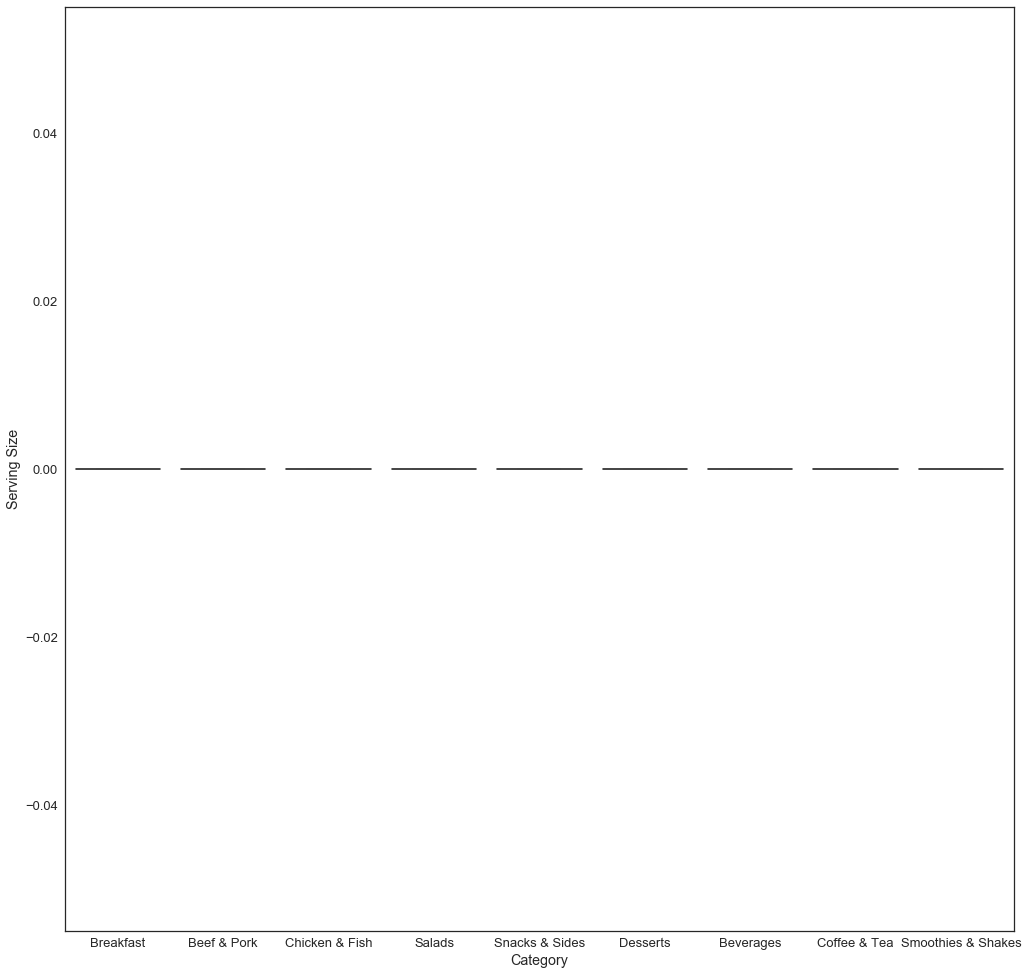

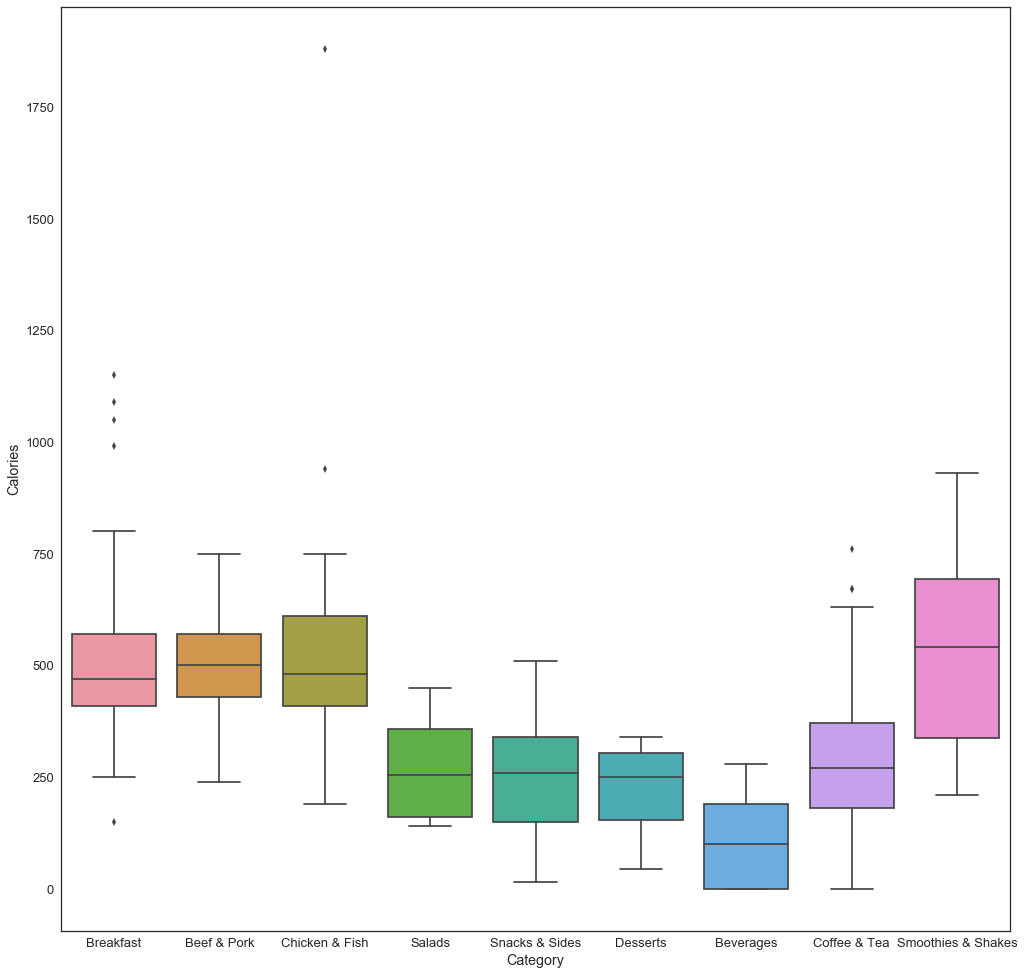

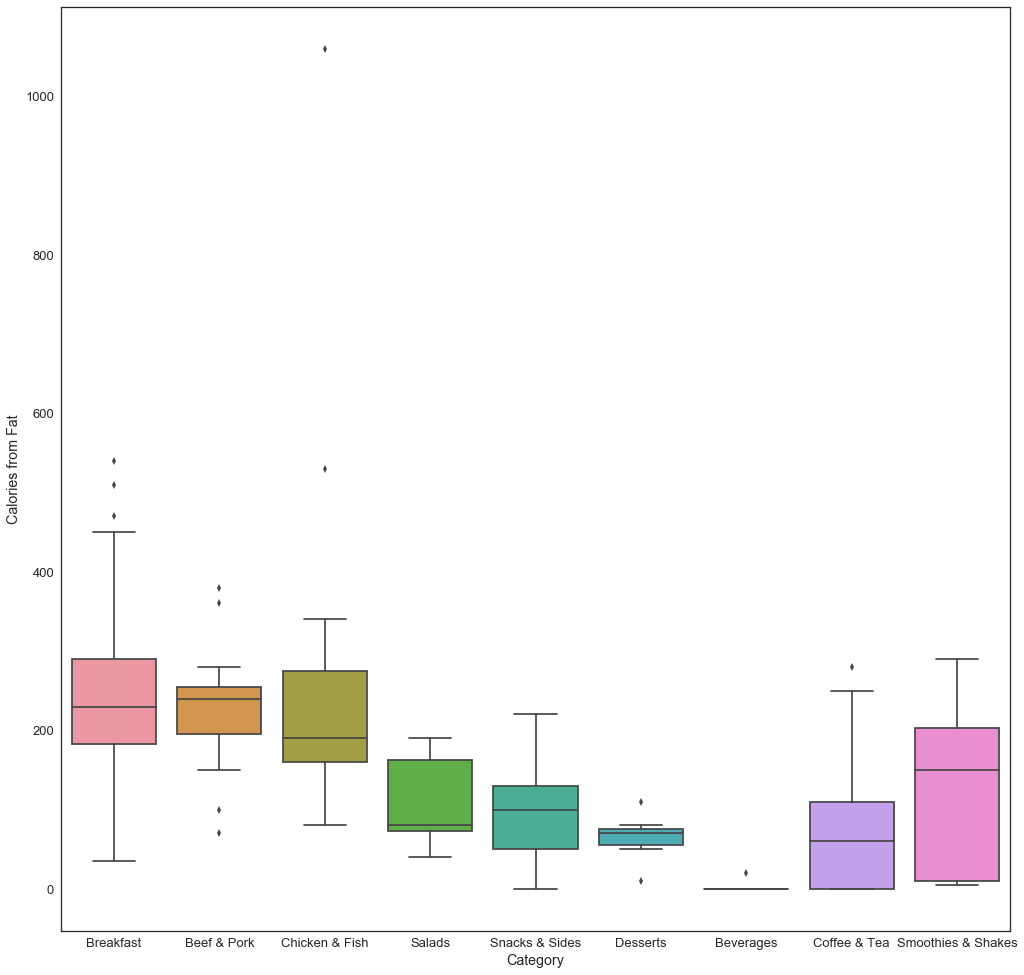

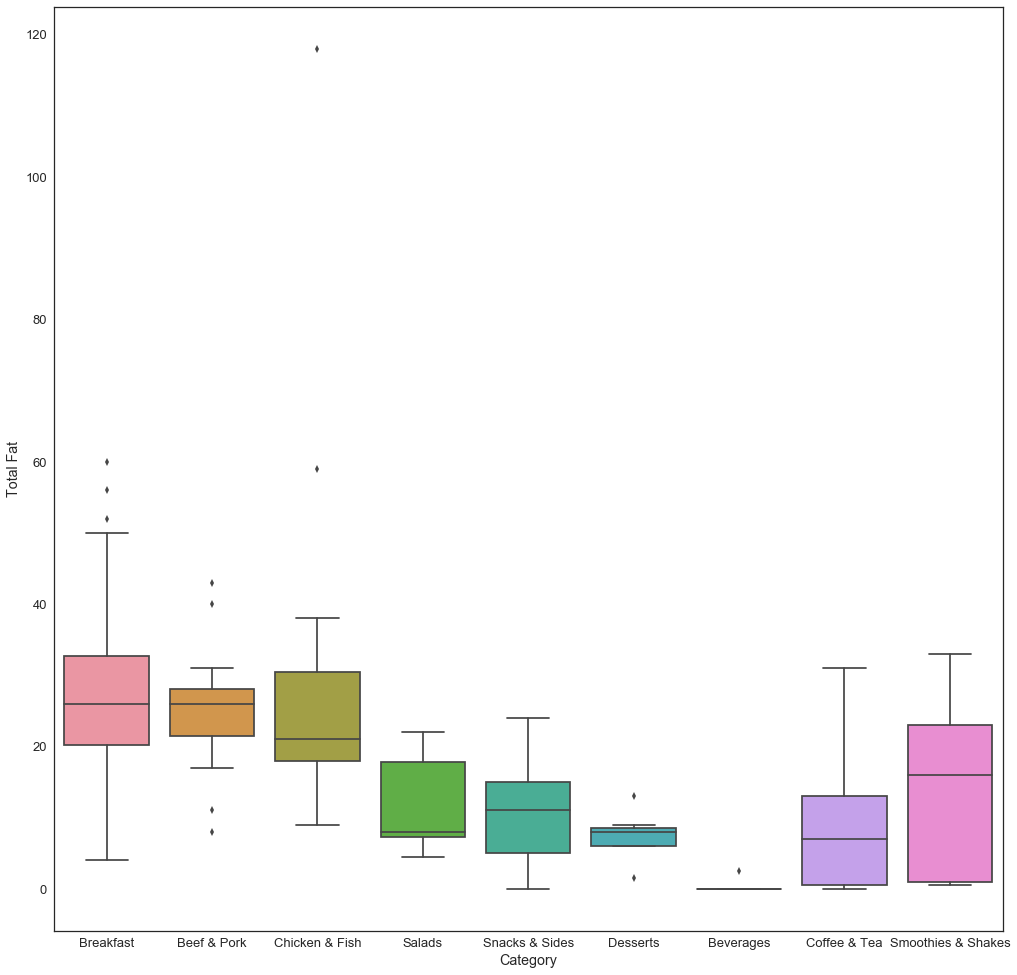

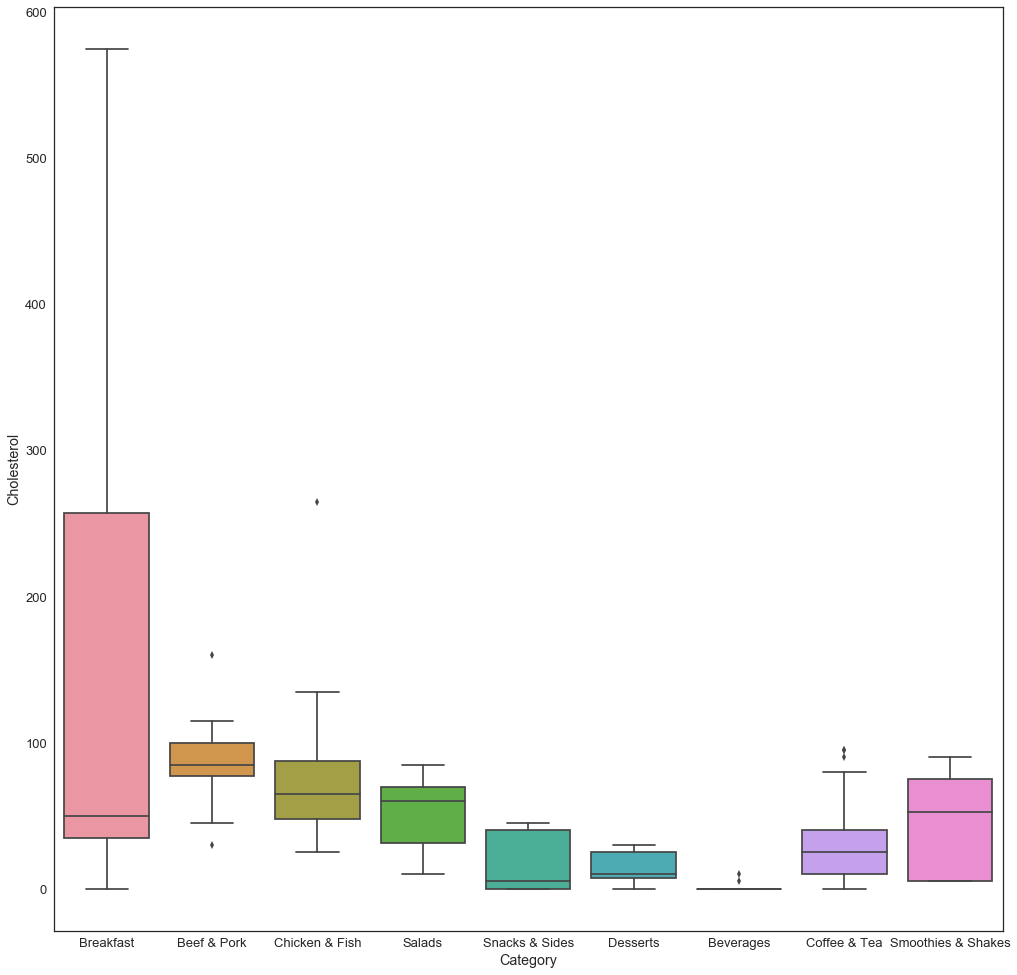

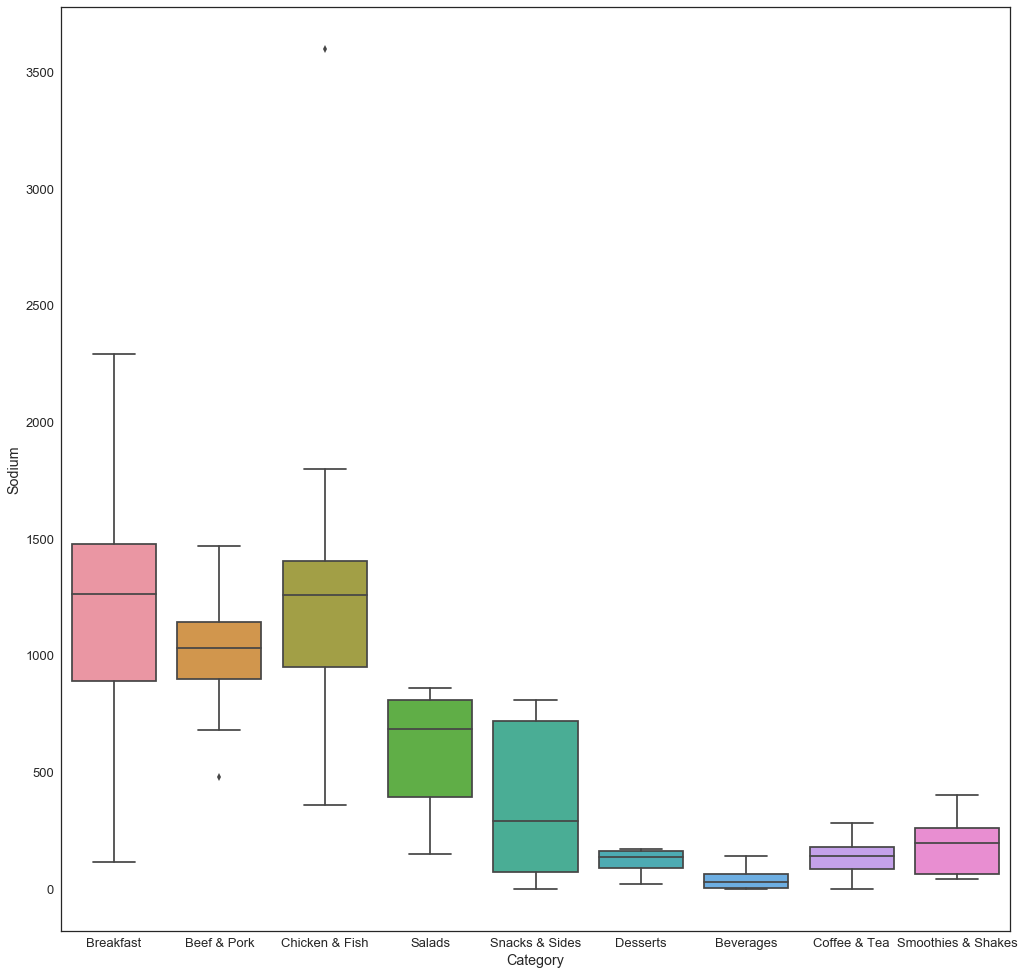

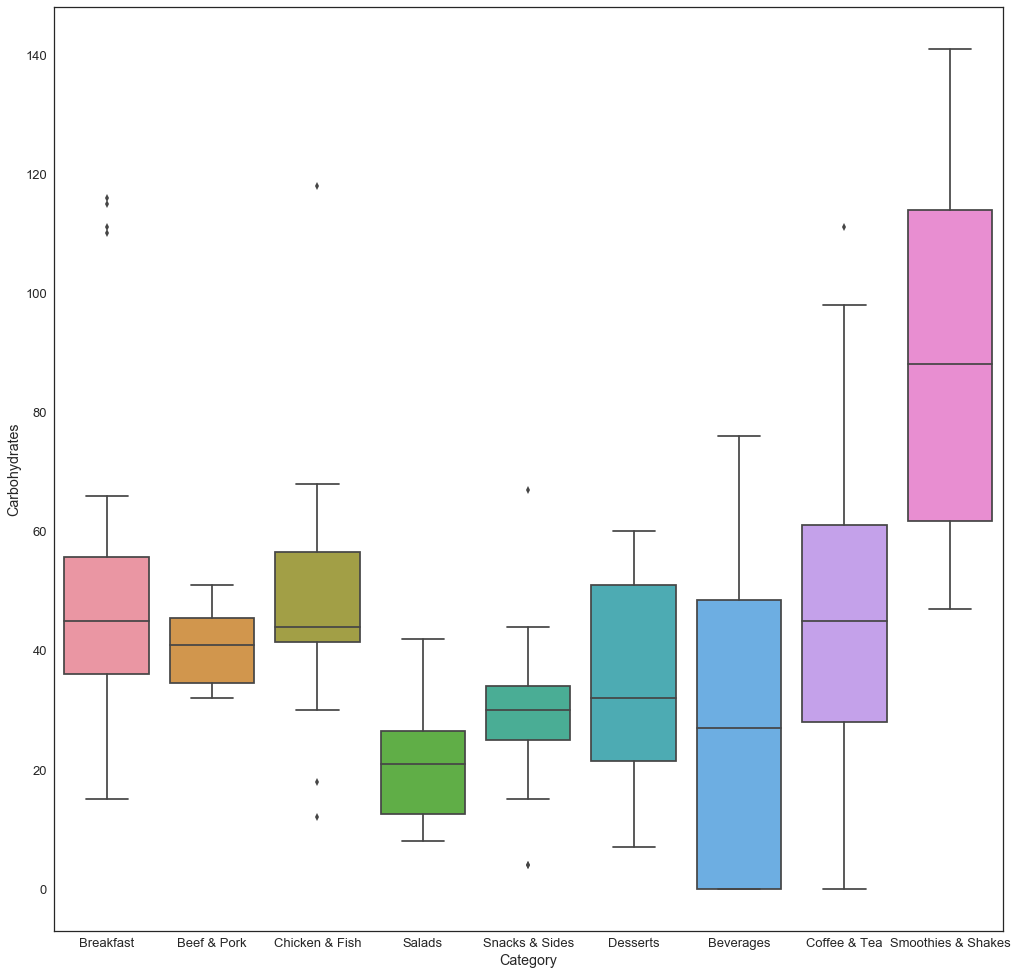

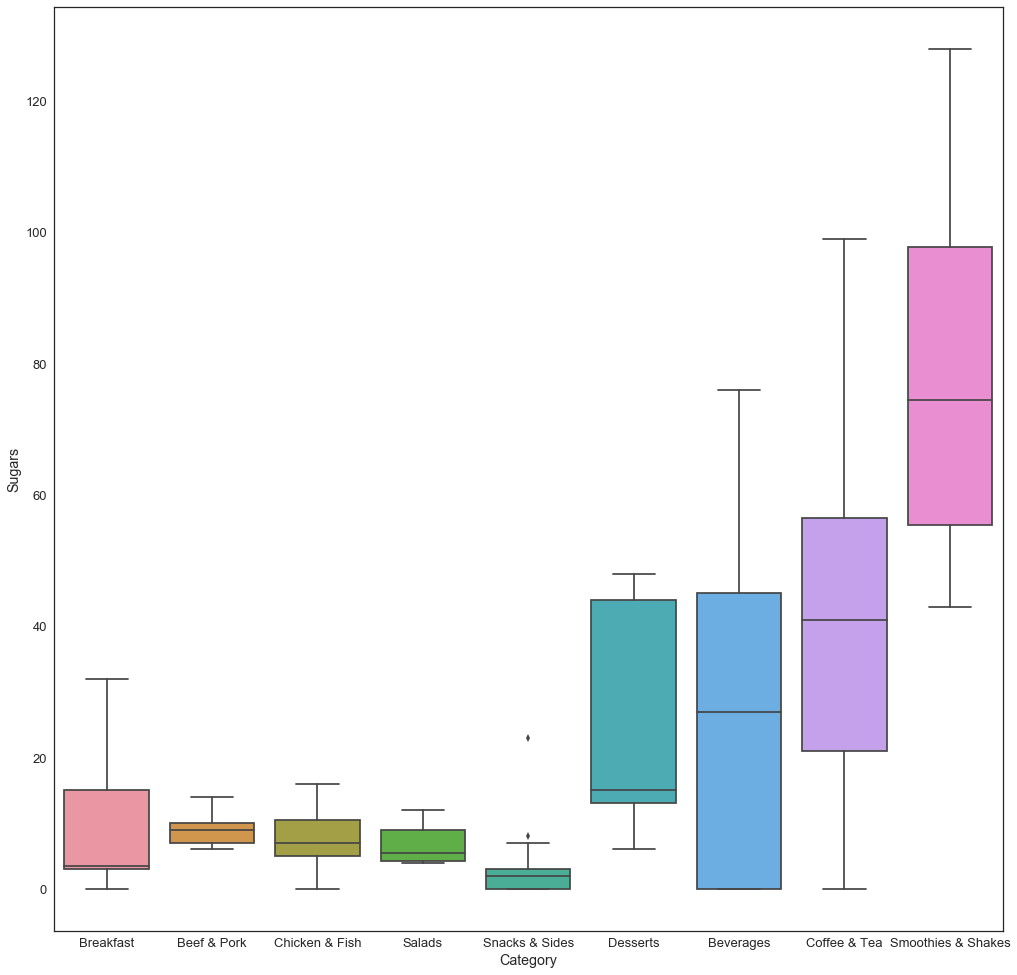

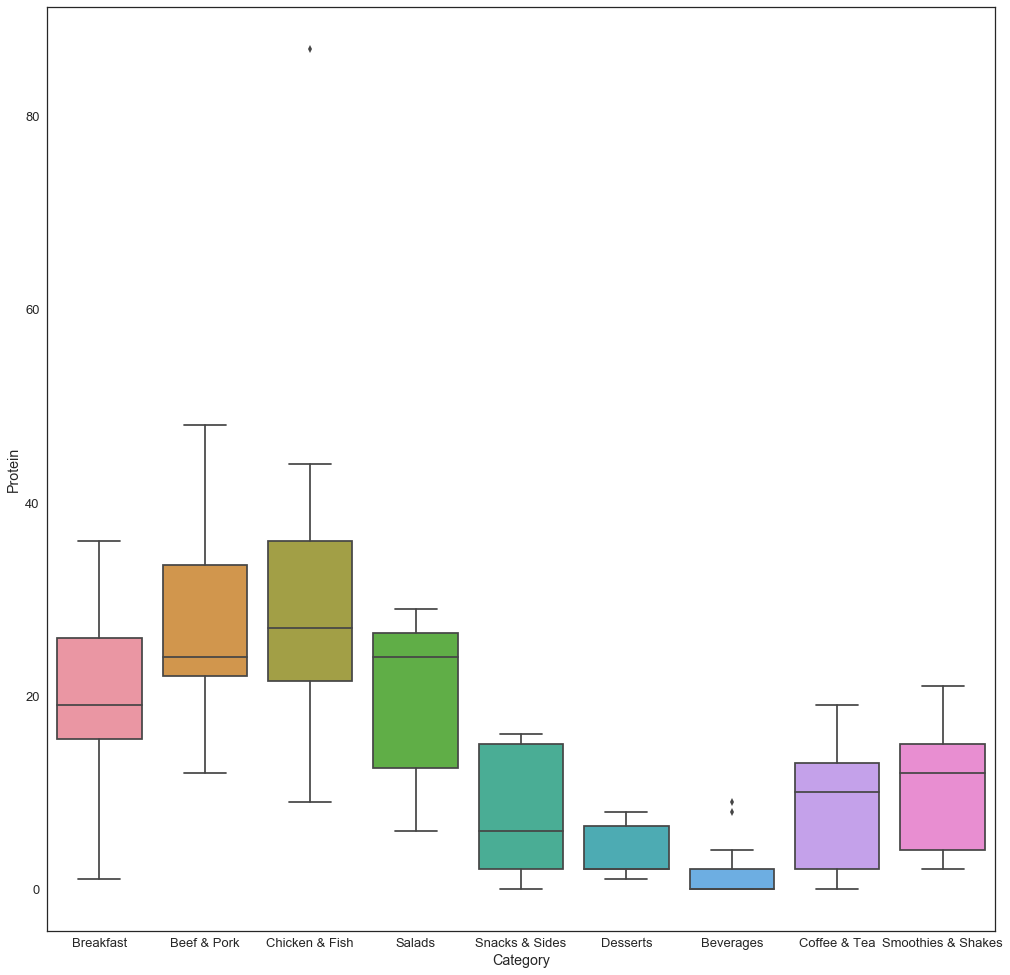

In [21]:
for column in focus_columns[1:]:
    plt.figure(figsize=(17,17))
    sns.boxplot(x = "Category", y = column, data = mcd_menu)

In [22]:
mcd_menu[(mcd_menu['Category'] == 'Chicken & Fish') | (mcd_menu['Category'] == 'Beef & Pork') | (mcd_menu['Category'] == 'Salads')][focus_columns].describe()

,Serving Size,Calories,Calories from Fat,Total Fat,Cholesterol,Sodium,Carbohydrates,Sugars,Protein
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.0,499.166667,220.000000,24.406250,76.145833,1100.000000,42.854167,7.729167,27.395833
std,0.0,260.840159,154.313855,17.226481,40.452751,518.894078,17.531722,3.846743,12.928181
min,0.0,140.000000,40.000000,4.500000,10.000000,150.000000,8.000000,0.000000,6.000000
25%,0.0,380.000000,150.000000,16.750000,50.000000,835.000000,34.750000,6.000000,22.000000
50%,0.0,460.000000,195.000000,22.000000,72.500000,1065.000000,42.000000,7.000000,27.000000
75%,0.0,592.500000,252.500000,28.250000,90.000000,1325.000000,51.000000,10.000000,33.000000
max,0.0,1880.000000,1060.000000,118.000000,265.000000,3600.000000,118.000000,16.000000,87.000000


### Subway

/Users/alexschwartz/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


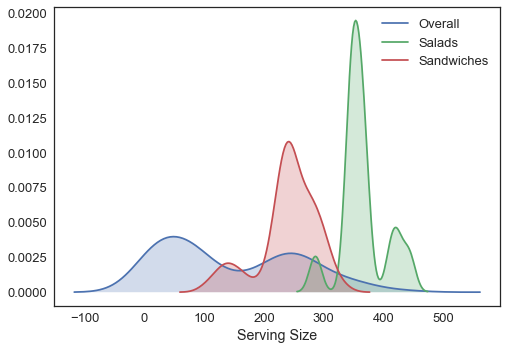

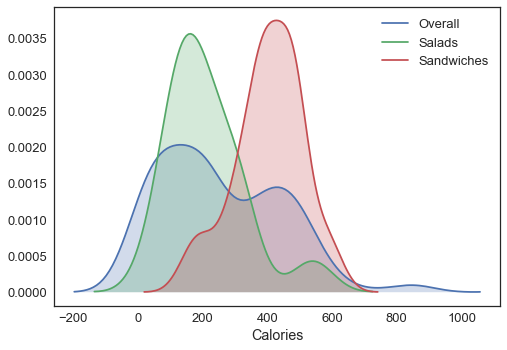

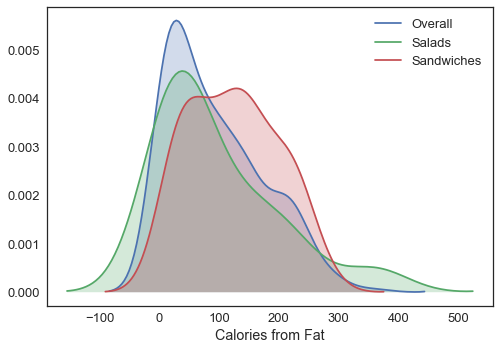

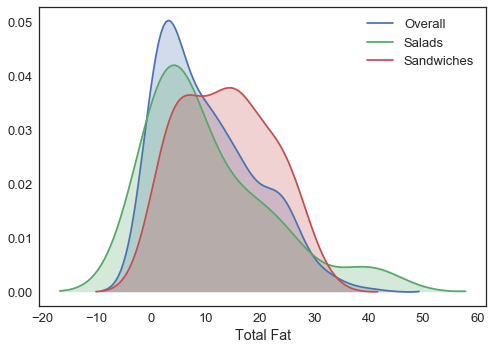

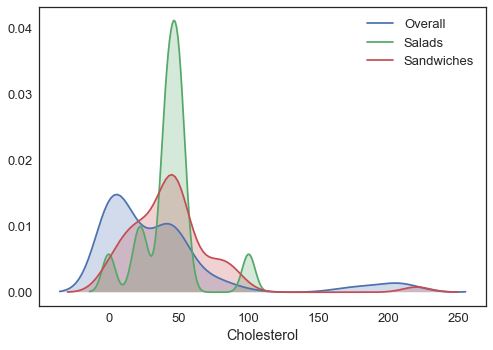

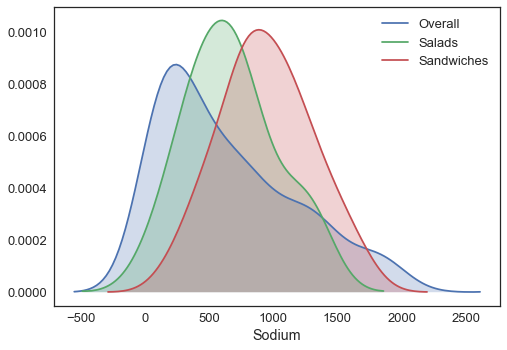

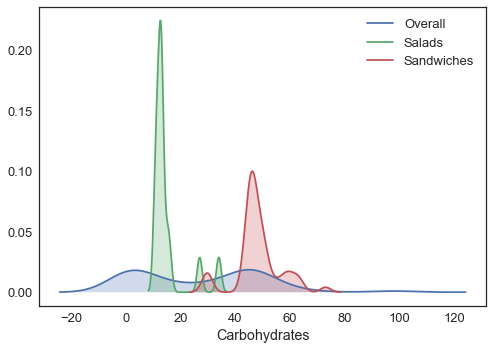

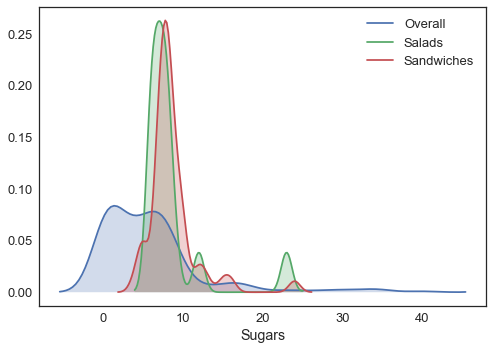

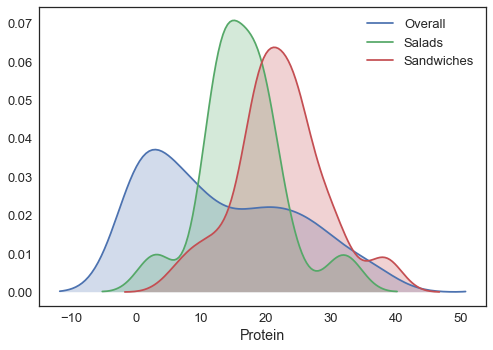

In [23]:
for column in focus_columns[1:]:
    sns.distplot(subway_menu[column], hist=False, kde_kws={"shade": True}, label = 'Overall')
    sns.distplot(subway_menu[subway_menu.Category == 'Salad'][column], hist=False, kde_kws={"shade": True}, label = 'Salads')
    sns.distplot(subway_menu[subway_menu.Category == 'Sandwich'][column], hist=False, kde_kws={"shade": True}, label = 'Sandwiches')
    plt.figure()

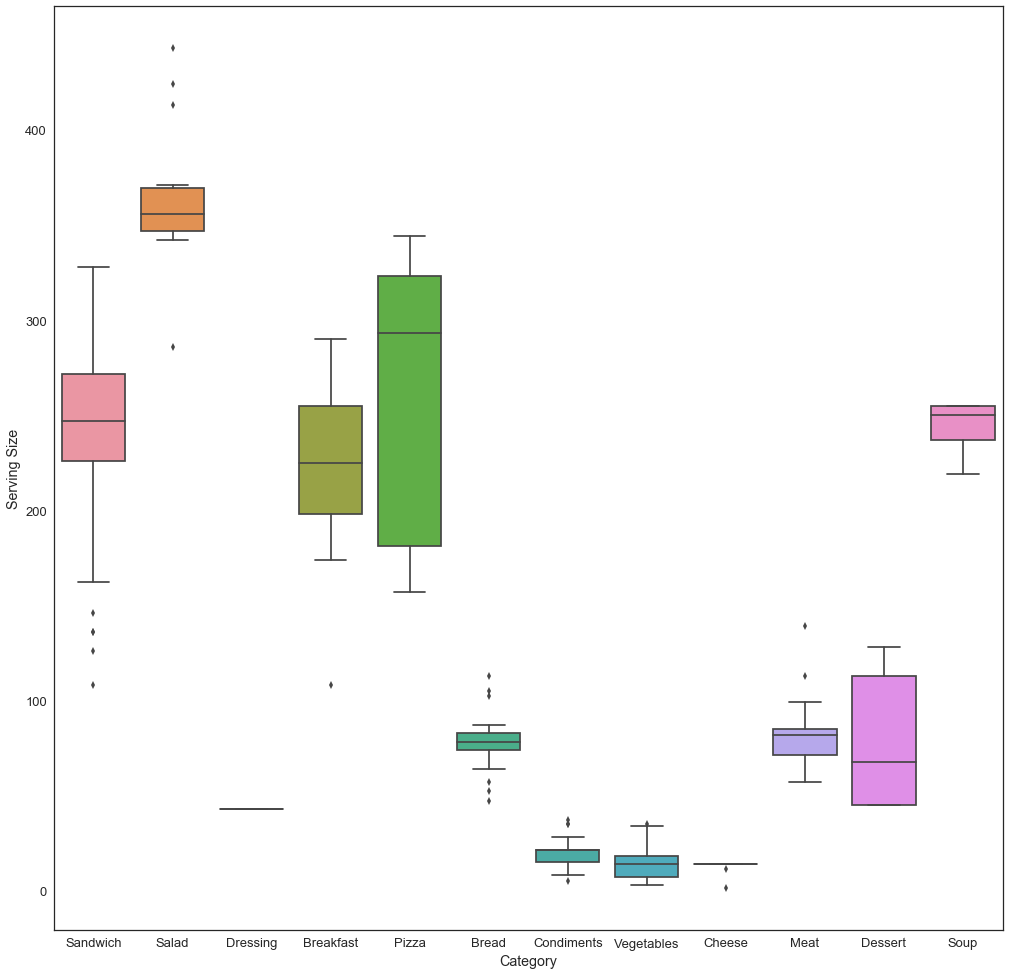

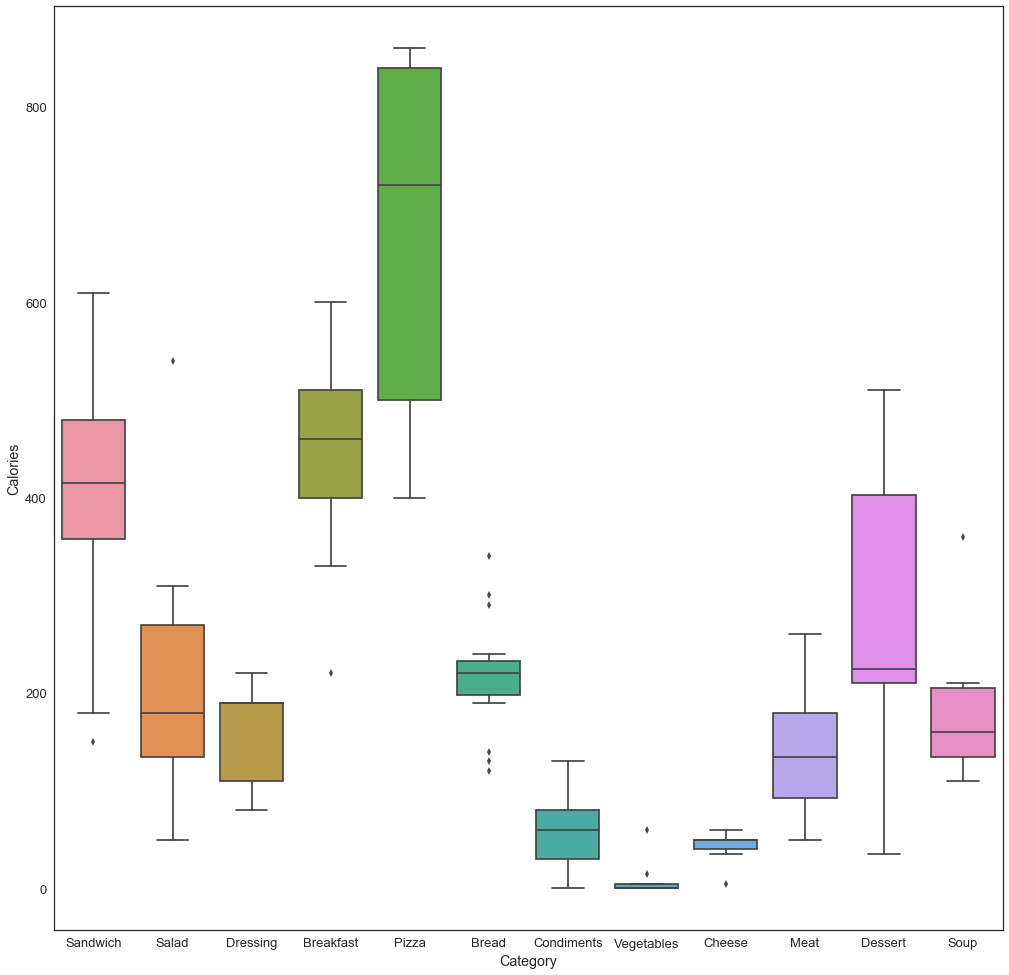

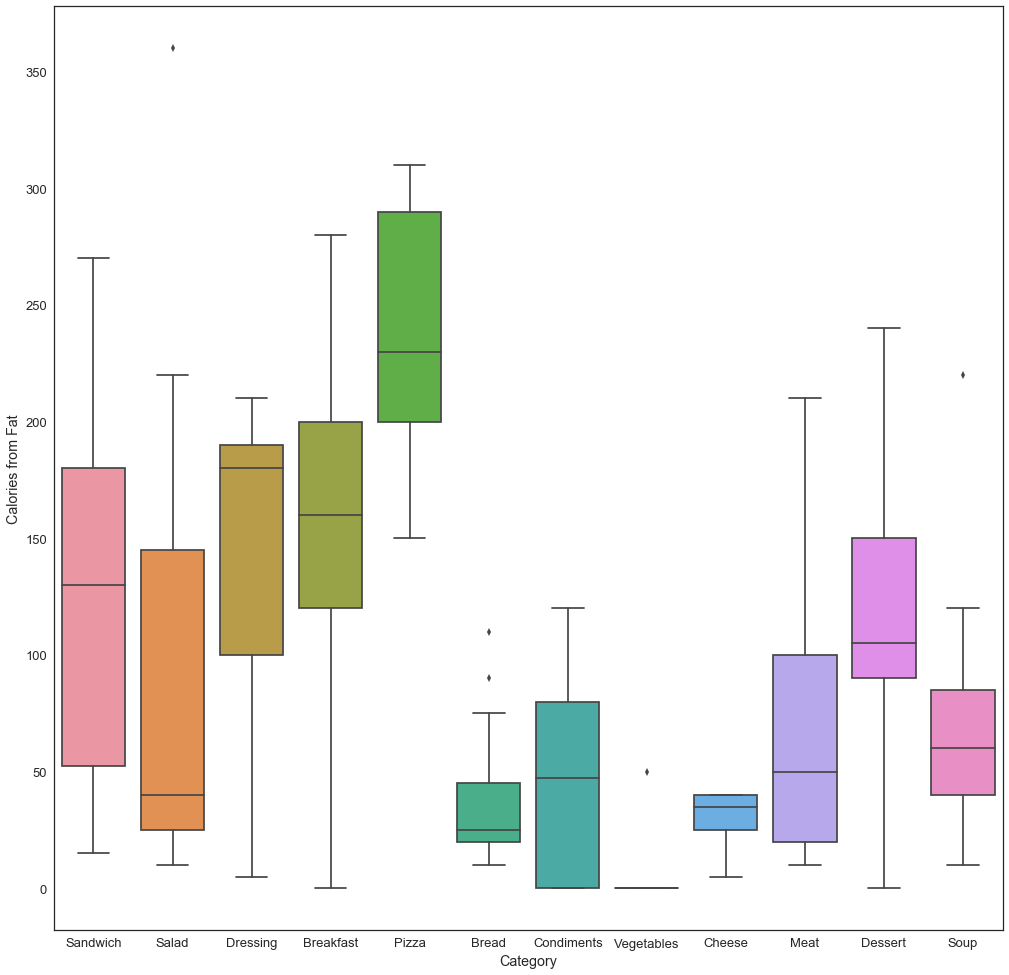

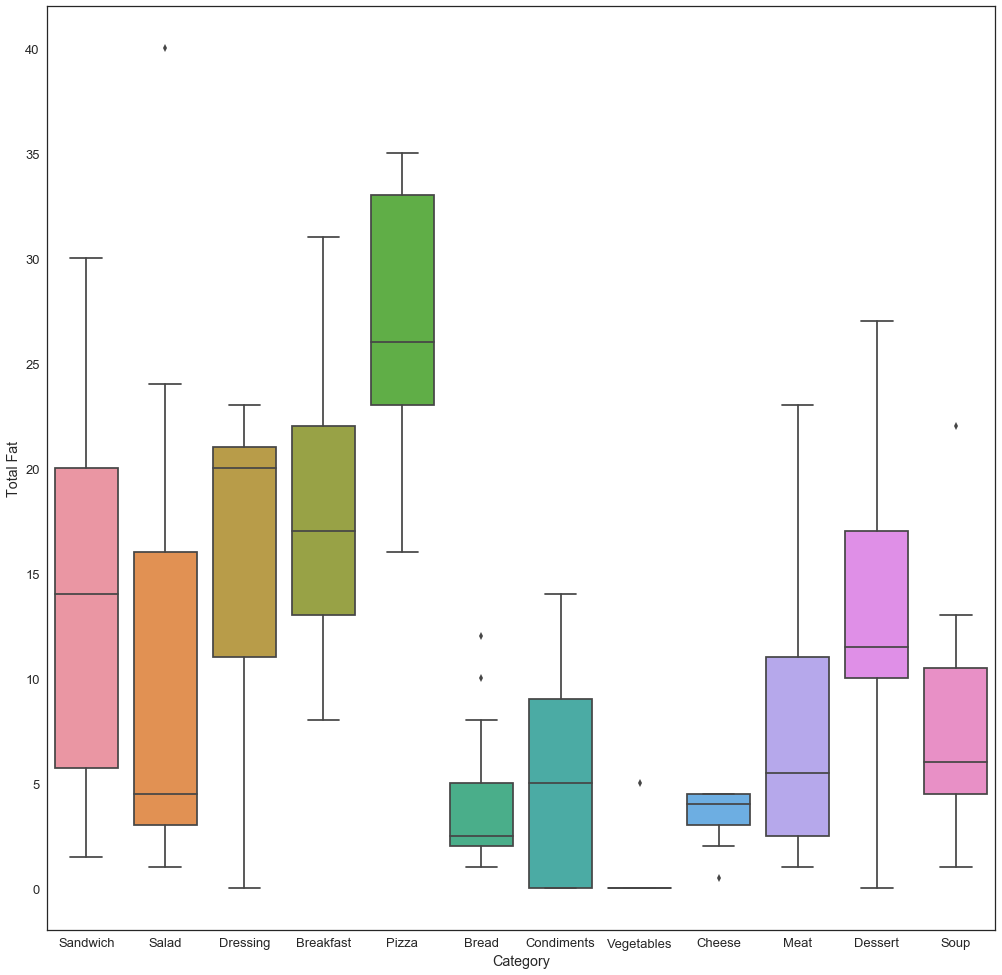

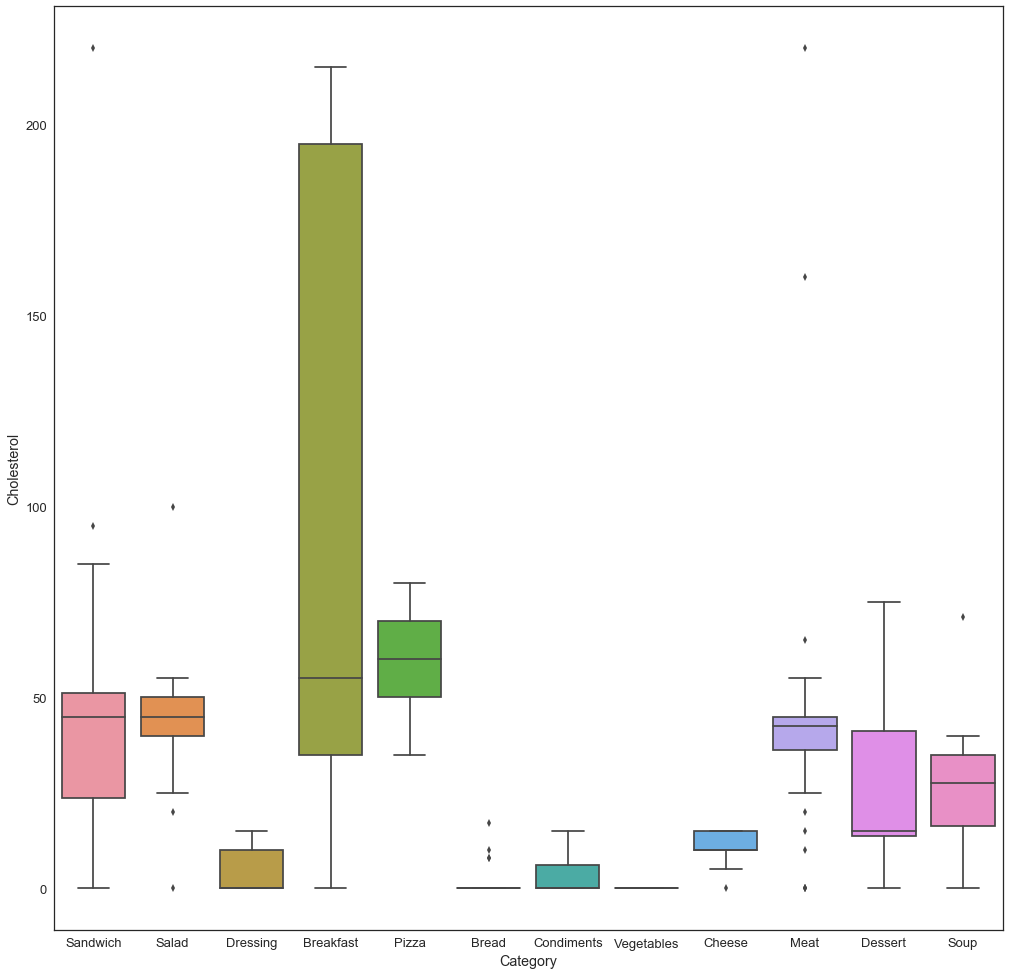

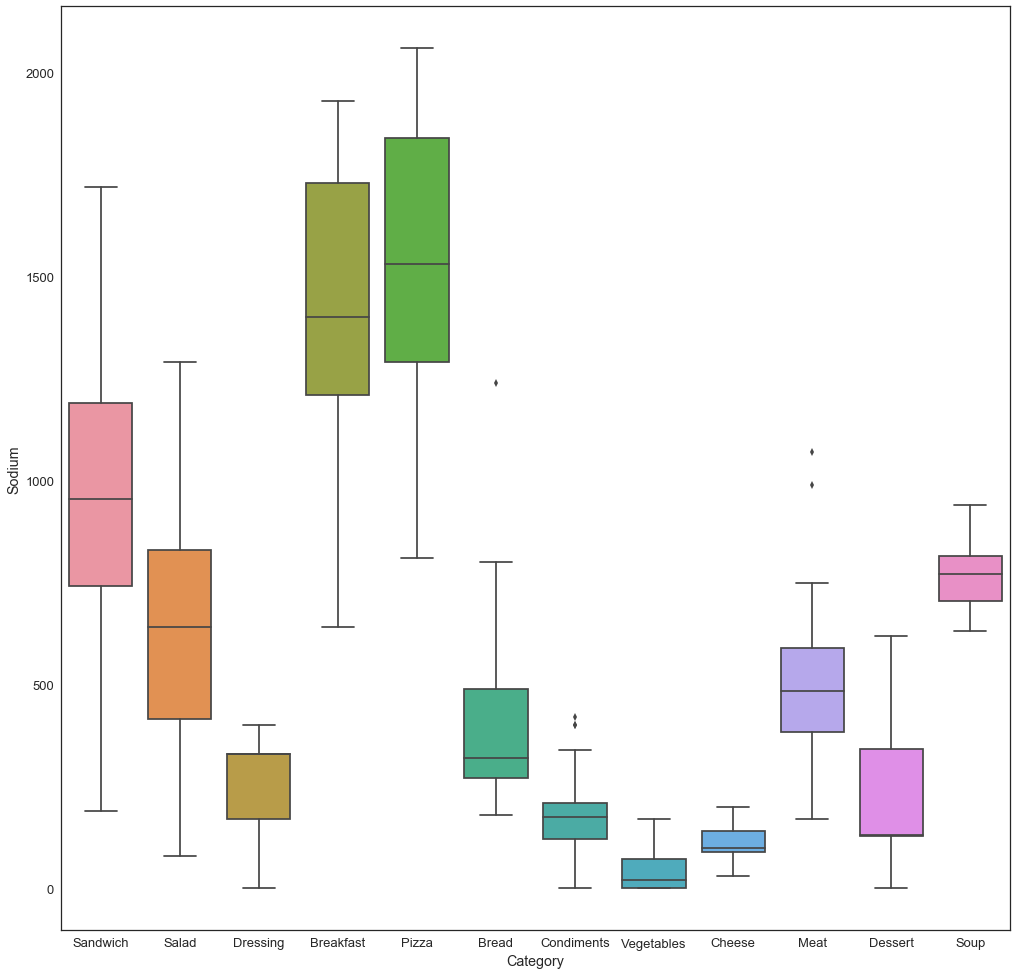

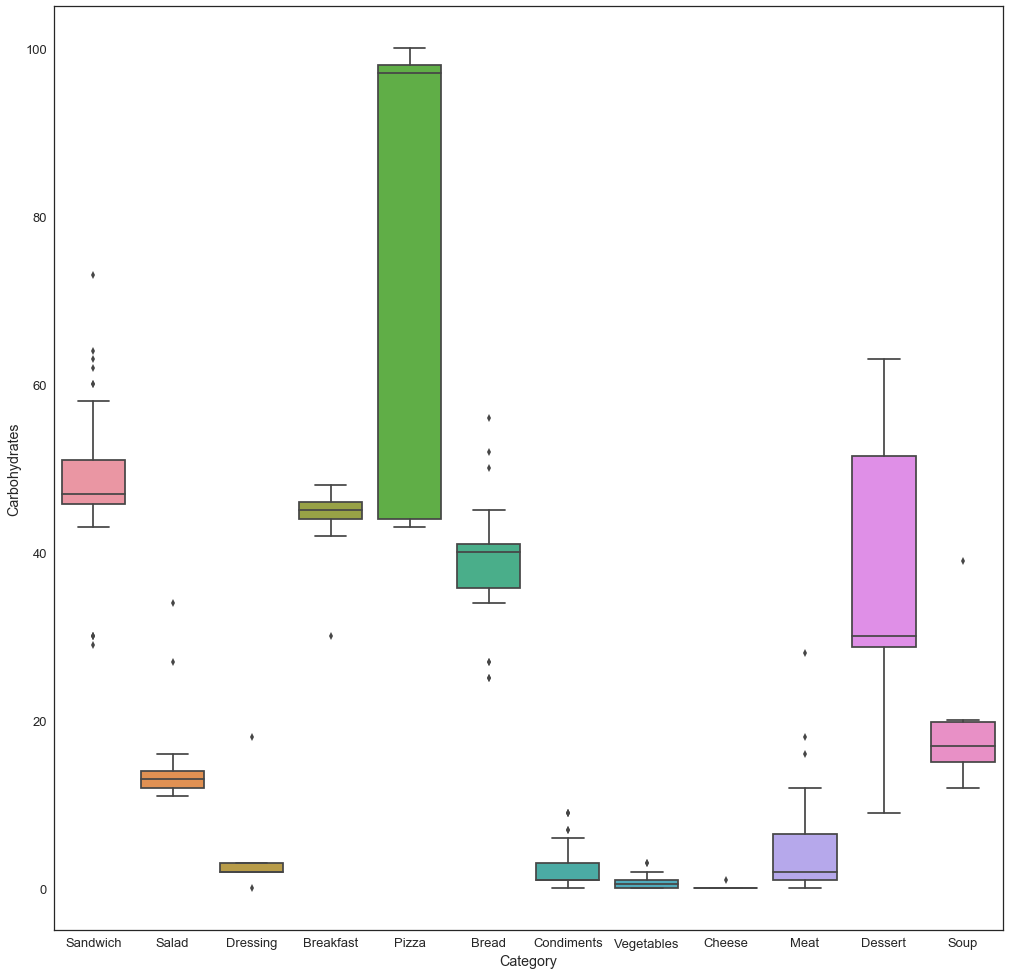

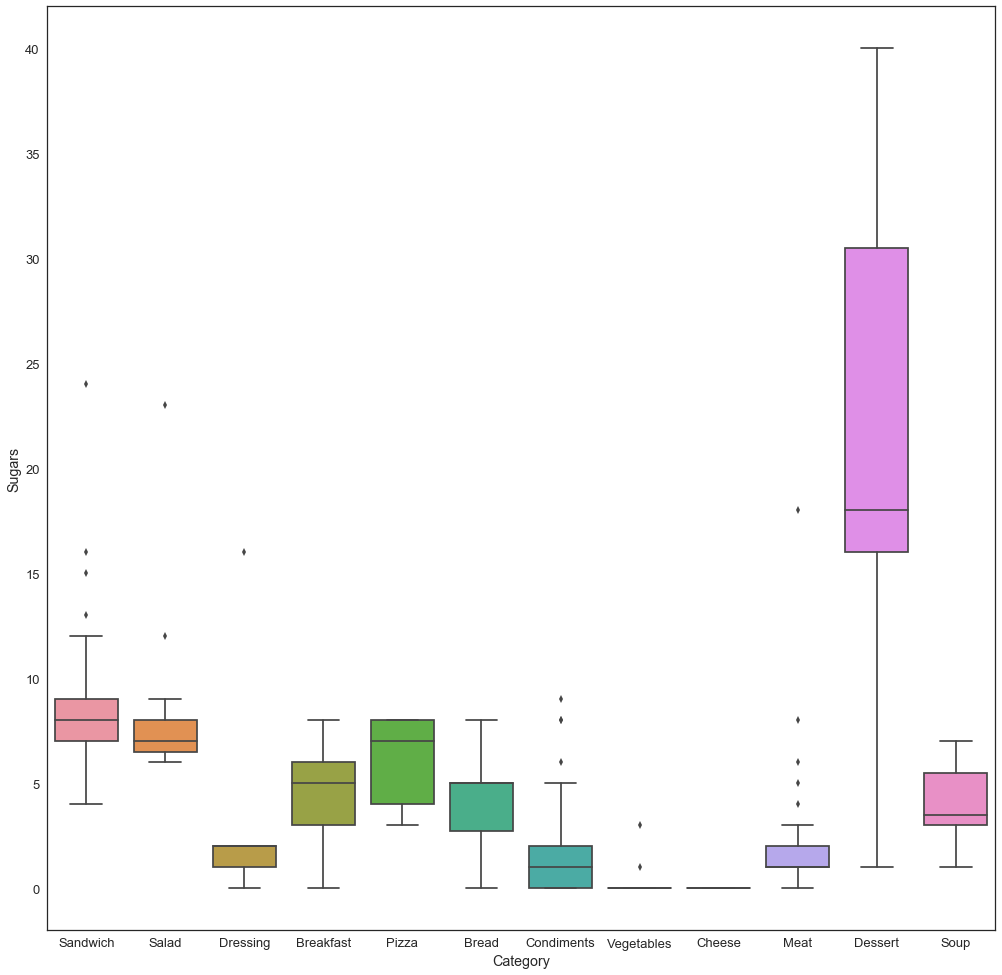

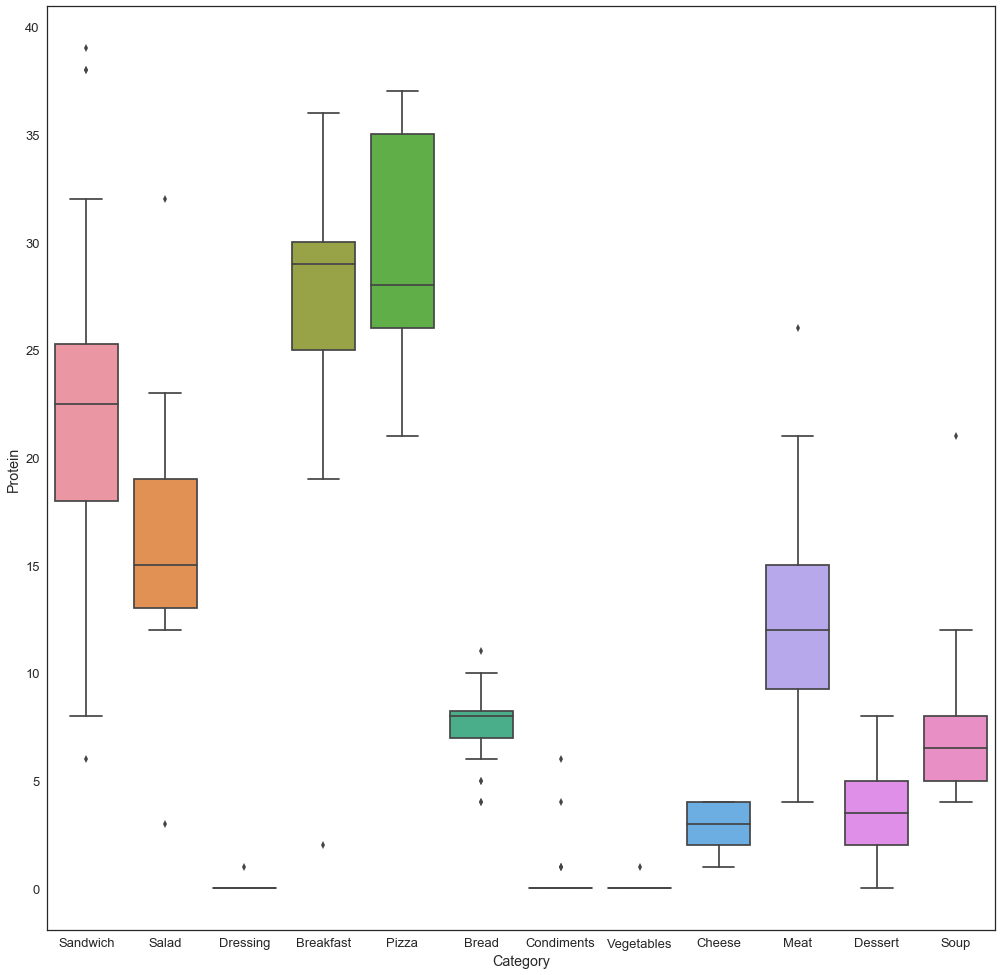

In [24]:
for column in focus_columns[1:]:
    plt.figure(figsize=(17,17))
    sns.boxplot(x = "Category", y = column, data = subway_menu)

In [25]:
subway_menu[(subway_menu['Category'] == 'Sandwich') | (subway_menu['Category'] == 'Salad') | (subway_menu['Category'] == 'Pizza')][focus_columns].describe()

,Serving Size,Calories,Calories from Fat,Total Fat,Cholesterol,Sodium,Carbohydrates,Sugars,Protein
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,266.960526,396.052632,131.644737,14.625000,46.315789,954.605263,44.828947,8.289474,21.934211
std,70.393644,172.526937,86.627125,9.686115,30.390442,425.492470,20.674228,3.361808,7.663481
min,108.000000,50.000000,10.000000,1.000000,0.000000,80.000000,11.000000,3.000000,3.000000
25%,232.250000,305.000000,40.000000,5.000000,30.000000,657.500000,40.750000,7.000000,18.000000
50%,260.000000,400.000000,135.000000,15.000000,45.000000,890.000000,46.000000,8.000000,21.000000
75%,311.000000,482.500000,202.500000,23.000000,55.000000,1272.500000,50.250000,9.000000,26.000000
max,443.000000,860.000000,360.000000,40.000000,220.000000,2060.000000,100.000000,24.000000,39.000000


## Pearson Correlation

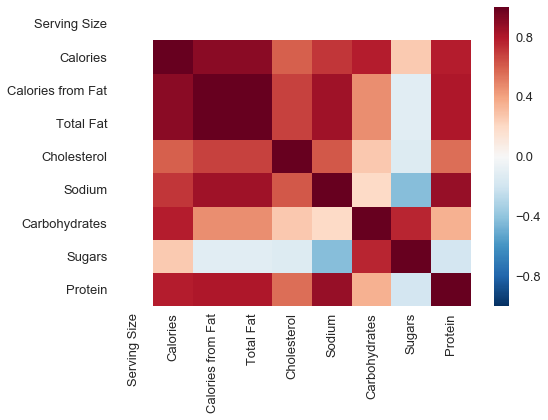

In [26]:
sns.heatmap(mcd_menu[focus_columns].corr(method='pearson', min_periods=1))

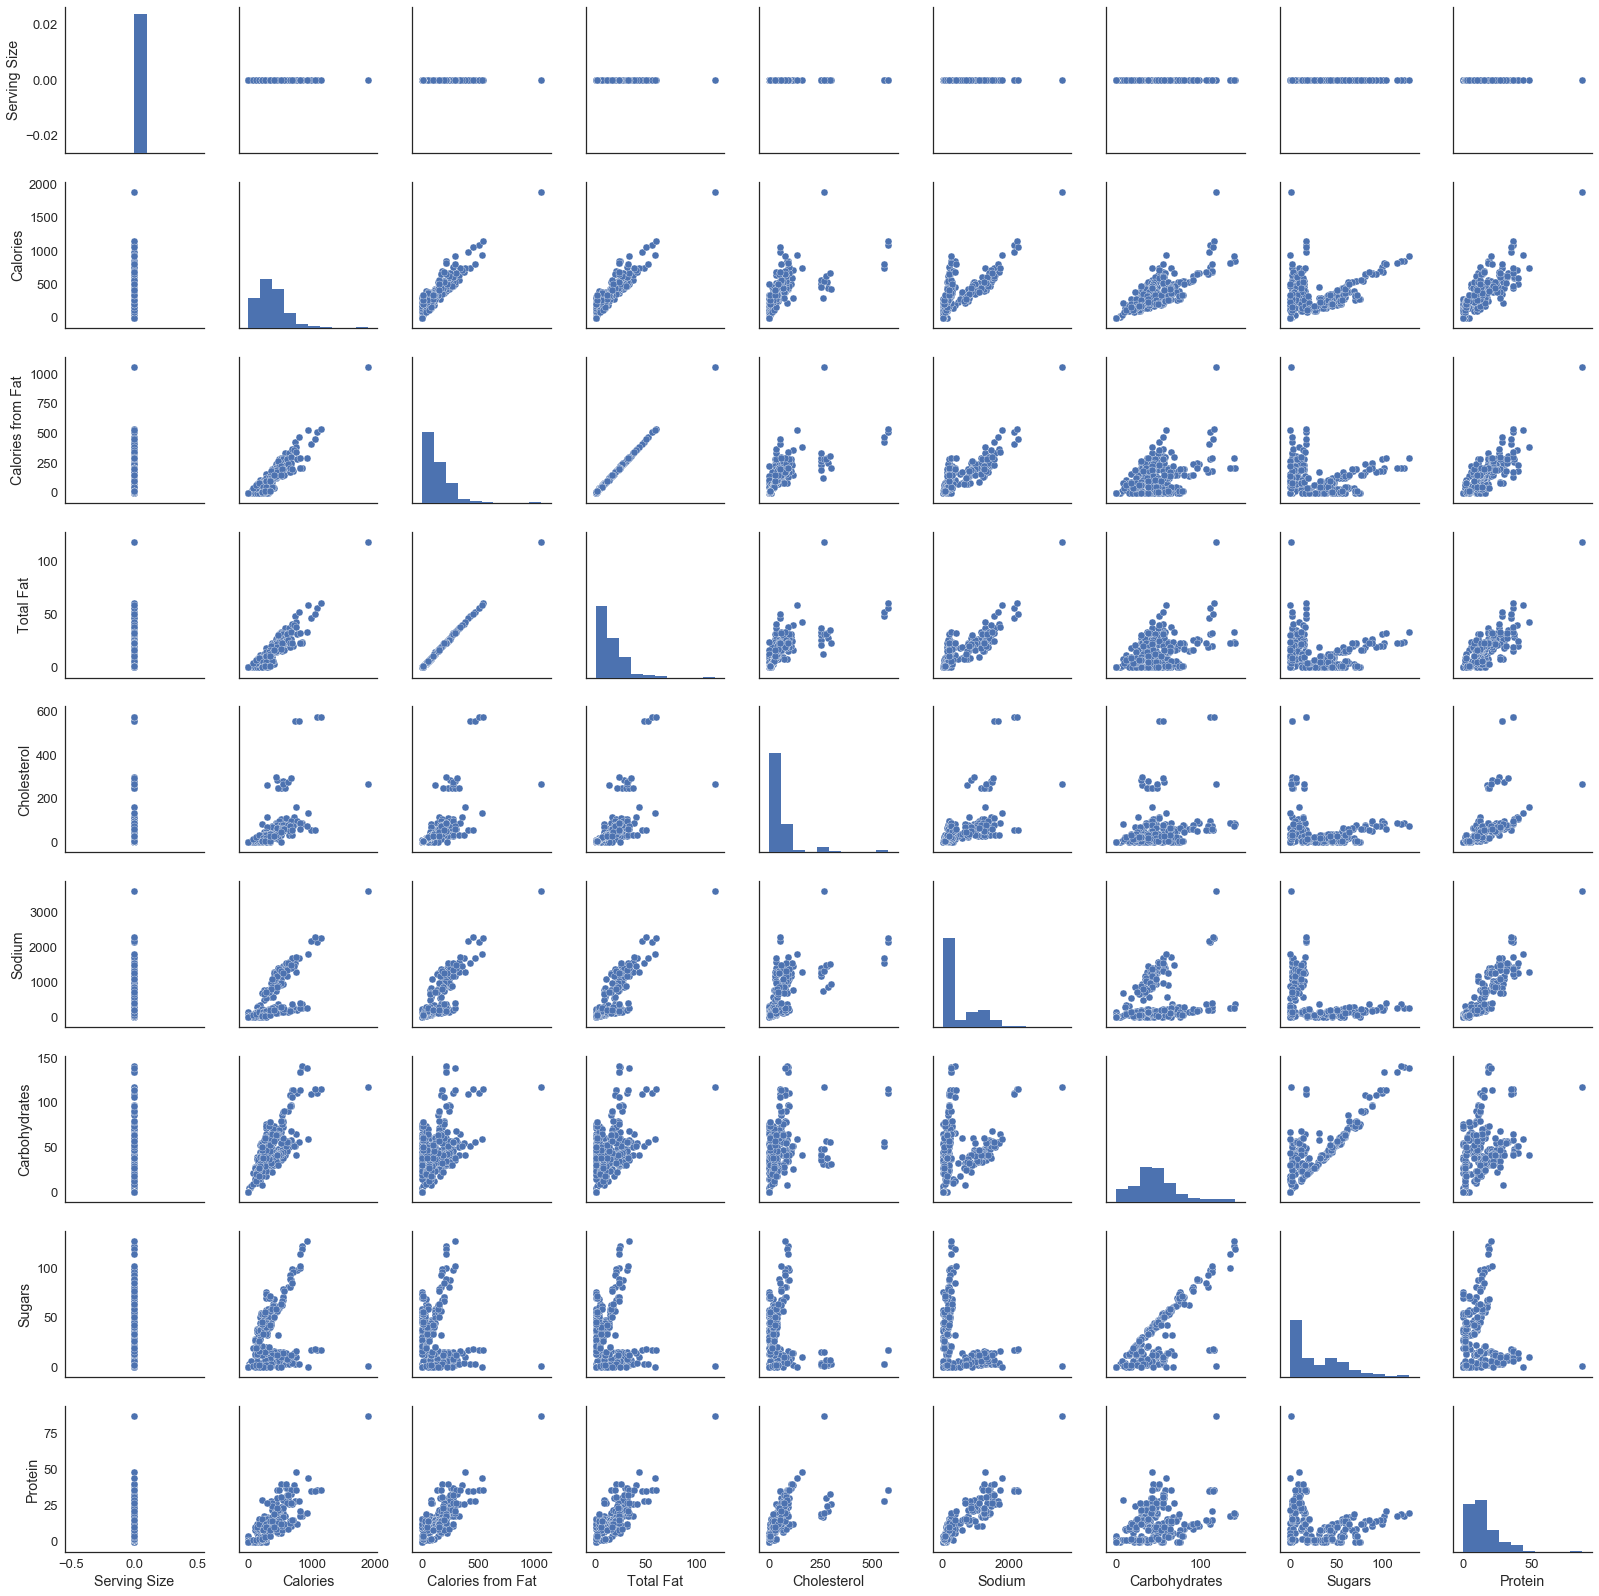

In [27]:
sns.pairplot(mcd_menu[focus_columns])

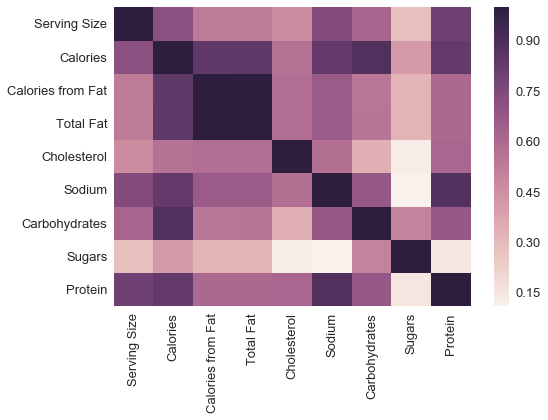

In [28]:
sns.heatmap(subway_menu[focus_columns].corr(method='pearson', min_periods=1))

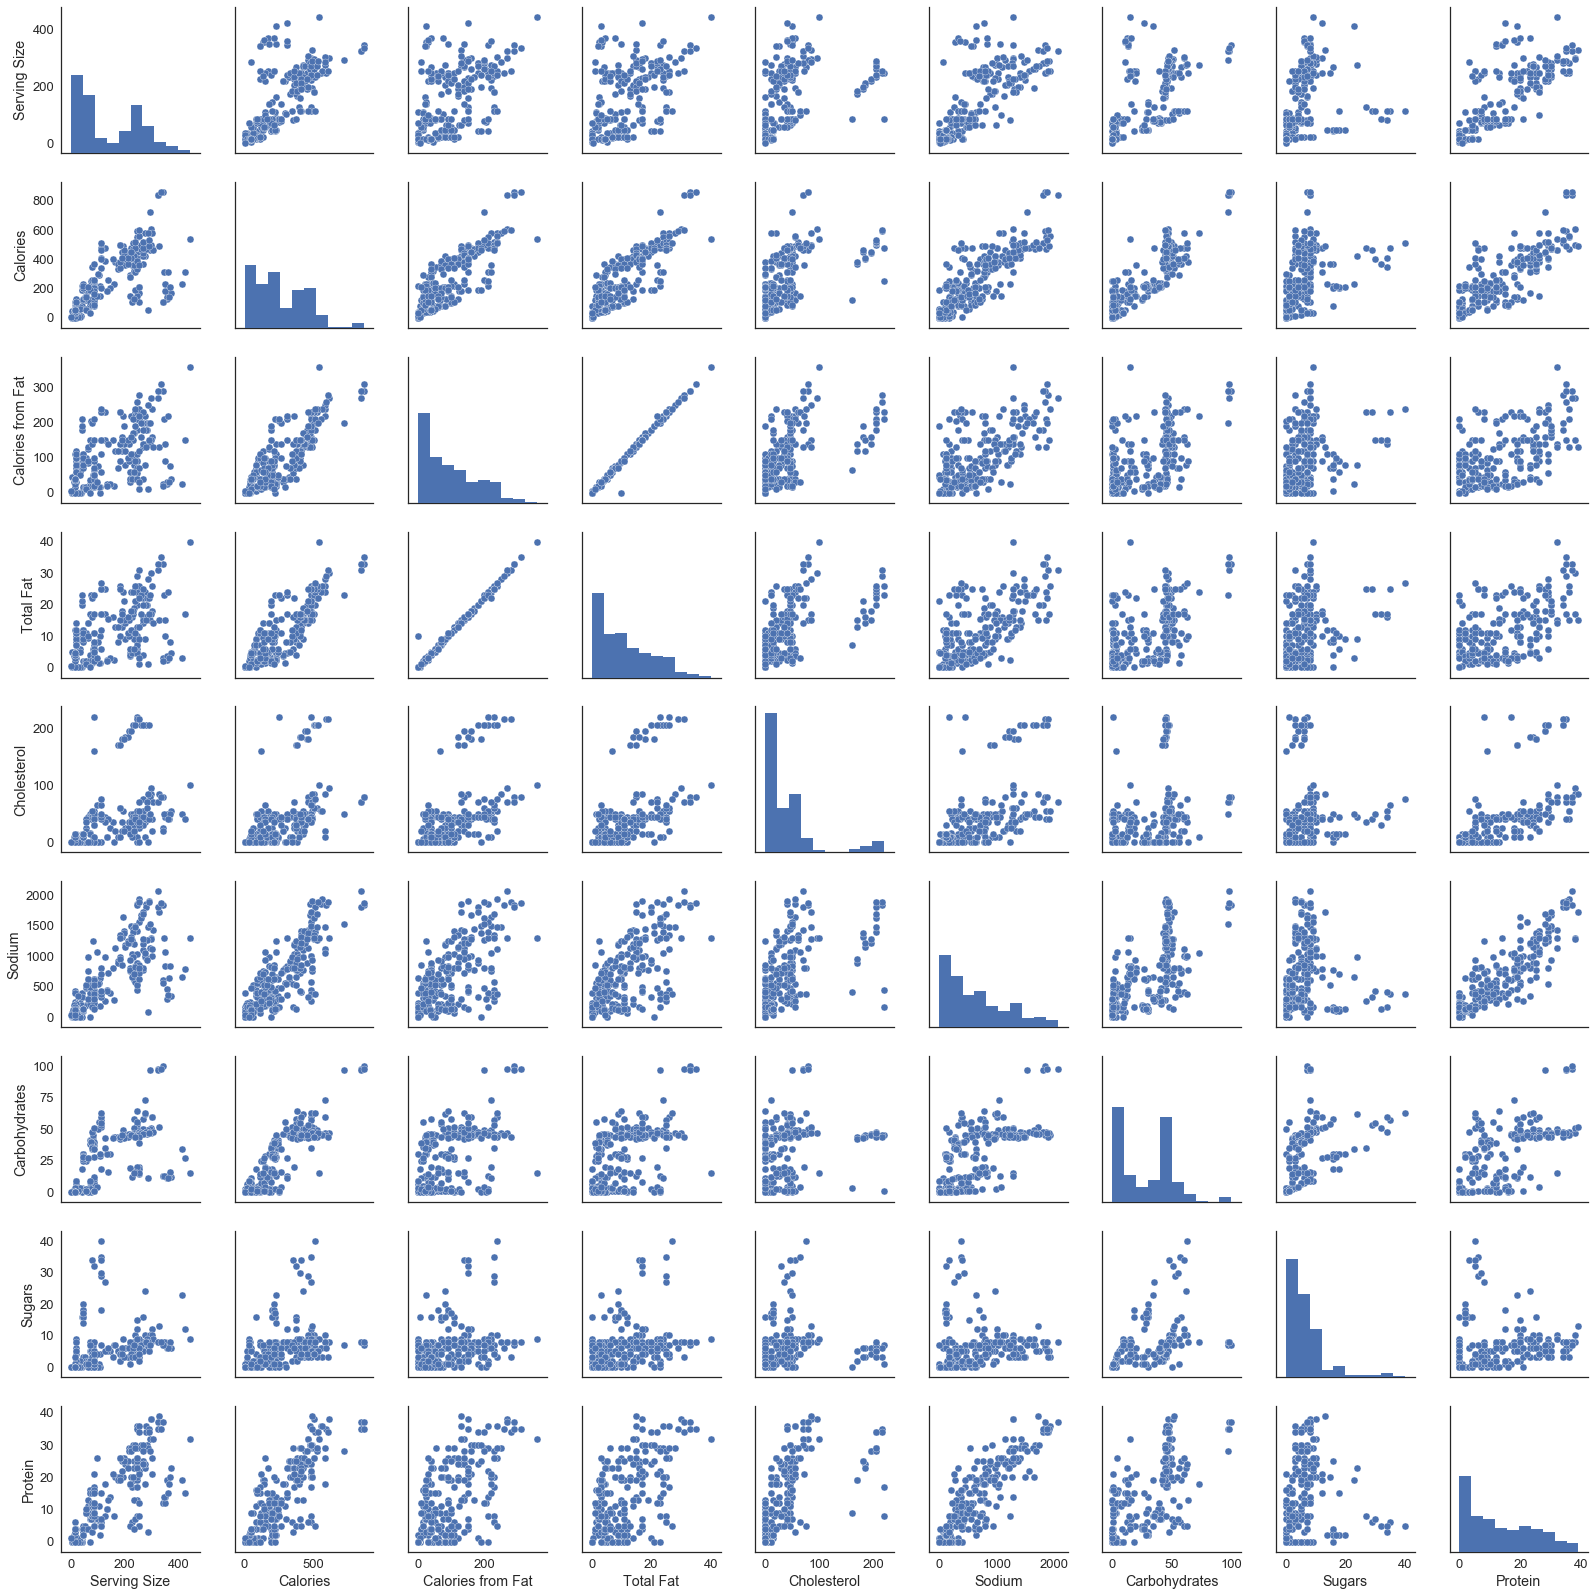

In [29]:
sns.pairplot(subway_menu[focus_columns])

## K-Means Clustering

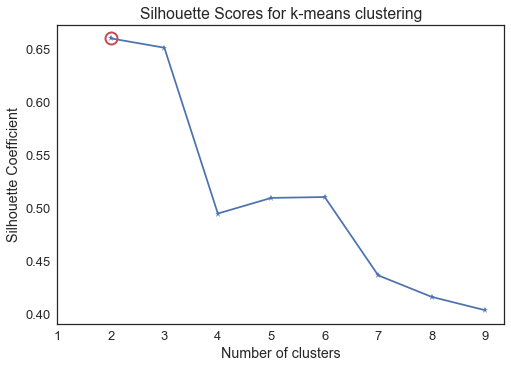

In [30]:
## Getting K for mcd_menu
X = mcd_menu[focus_columns[1:]].copy()
K = range(2,10)

KM = [skc.KMeans(n_clusters=k).fit(X) for k in K]
silh_scores = [skm.silhouette_score(X,km.labels_) for km in KM]
kIdx = np.argmax(silh_scores)

plt.plot(K, silh_scores, 'b*-')
plt.plot(K[kIdx], silh_scores[kIdx], marker='o', markersize=12, 
         markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.xlim(1, plt.xlim()[1])
plt.xlabel('Number of clusters');
plt.ylabel('Silhouette Coefficient');
plt.title('Silhouette Scores for k-means clustering');

In [31]:
best_k = 2
kmeans_model = skc.KMeans(n_clusters = best_k)
kmeans_model.fit(X)
mcd_menu['labels'] = kmeans_model.labels_

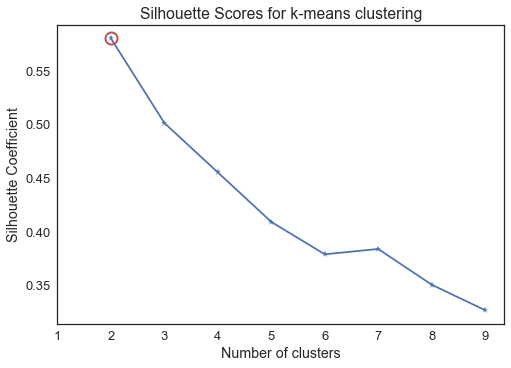

In [32]:
## Getting K for subway_menu
X = subway_menu[focus_columns[1:]].copy()
K = range(2,10)

KM = [skc.KMeans(n_clusters=k).fit(X) for k in K]
silh_scores = [skm.silhouette_score(X,km.labels_) for km in KM]
kIdx = np.argmax(silh_scores)

plt.plot(K, silh_scores, 'b*-')
plt.plot(K[kIdx], silh_scores[kIdx], marker='o', markersize=12, 
         markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.xlim(1, plt.xlim()[1])
plt.xlabel('Number of clusters');
plt.ylabel('Silhouette Coefficient');
plt.title('Silhouette Scores for k-means clustering');

In [33]:
best_k = 4
kmeans_model = skc.KMeans(n_clusters = best_k)
kmeans_model.fit(X)
subway_menu['labels'] = kmeans_model.labels_

## Decision Tree

## Multidimensional Visualization Techniques?

## Answer Remaining Research Questions